So far, you have written some test sentences and generated a word index and then created sequences for the sentences. 

Now you will tokenize and sequence a larger body of text, specifically reviews from Amazon and Yelp. 

## About the dataset

You will use a dataset containing Amazon and Yelp reviews of products and restaurants. This dataset was originally extracted from [Kaggle](https://www.kaggle.com/marklvl/sentiment-labelled-sentences-data-set).

The dataset includes reviews, and each review is labelled as 0 (bad) or 1 (good). However, in this exercise, you will only work with the reviews, not the labels, to practice tokenizing and sequencing the text. 

### Example good reviews:

*   This is hands down the best phone I've ever had.
*   Four stars for the food & the guy in the blue shirt for his great vibe & still letting us in to eat !

### Example bad reviews:  

*   A lady at the table next to us found a live green caterpillar In her salad
*   If you plan to use this in a car forget about it.

### See more reviews
Feel free to [download the dataset](https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P) from a drive folder belonging to Udacity and open it on your local machine to see more reviews.

In [1]:
# Import Tokenizer and pad_sequences
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import numpy and pandas
import numpy as np
import pandas as pd


# Get the corpus of text

The combined dataset of reviews has been saved in a Google drive belonging to Udacity. You can download it from there.

In [2]:
path = tf.keras.utils.get_file('reviews.csv', 
                               'https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P')
print (path)

131072/127831 [==============================] - 0s 0us/step
/root/.keras/datasets/reviews.csv


# Get the dataset

Each row in the csv file is a separate review.

The csv file has 2 columns:

*   **text** (the review)
*   **sentiment** (0 or 1 indicating a bad or good review)

In [3]:
# Read the csv file
dataset = pd.read_csv(path)

# Review the first few entries in the dataset
dataset.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


# Get the reviews from the csv file

In [4]:
# Get the reviews from the text column
reviews = dataset['text'].tolist()

# Tokenize the text
Create the tokenizer, specify the OOV token, tokenize the text, then inspect the word index.

In [5]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(reviews)

word_index = tokenizer.word_index
print(len(word_index))
print(word_index)


3261
{'<OOV>': 1, 'the': 2, 'and': 3, 'i': 4, 'a': 5, 'it': 6, 'to': 7, 'is': 8, 'was': 9, 'this': 10, 'of': 11, 'not': 12, 'for': 13, 'my': 14, 'in': 15, 'with': 16, 'very': 17, 'good': 18, 'great': 19, 'phone': 20, 'that': 21, 'on': 22, 'have': 23, 'you': 24, 'food': 25, 'had': 26, 'place': 27, 'so': 28, 'but': 29, 'service': 30, 'are': 31, 'be': 32, 'we': 33, 'all': 34, 'as': 35, 'at': 36, 'like': 37, 'they': 38, 'time': 39, 'back': 40, 'one': 41, 'were': 42, 'quality': 43, 'would': 44, 'really': 45, 'here': 46, 'if': 47, 'from': 48, 'well': 49, 'your': 50, 'just': 51, 'product': 52, 'up': 53, 'best': 54, "don't": 55, 'no': 56, 'will': 57, 'an': 58, 'there': 59, 'go': 60, 'me': 61, 'has': 62, 'only': 63, 'also': 64, 'works': 65, "i've": 66, 'out': 67, 'headset': 68, 'nice': 69, 'ever': 70, 'battery': 71, "it's": 72, 'sound': 73, 'than': 74, 'use': 75, 'or': 76, 'when': 77, "i'm": 78, 'our': 79, 'get': 80, 'what': 81, 'their': 82, 'after': 83, 'love': 84, 'been': 85, 'did': 86, 'exce

# Generate sequences for the reviews
Generate a sequence for each review. Set the max length to match the longest review. Add the padding zeros at the end of the review for reviews that are not as long as the longest one.

In [6]:
sequences = tokenizer.texts_to_sequences(reviews)
padded_sequences = pad_sequences(sequences, padding='post')

# What is the shape of the vector containing the padded sequences?
# The shape shows the number of sequences and the length of each one.
print(padded_sequences.shape)

# What is the first review?
print (reviews[0])

# Show the sequence for the first review
print(padded_sequences[0])

# Try printing the review and padded sequence for other elements.

(1992, 139)
So there is no way for me to plug it in here in the US unless I go by a converter.
[  28   59    8   56  142   13   61    7  269    6   15   46   15    2
  149  449    4   60  113    5 1429    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]


#Prepare the data for a simple NN model

In [7]:
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Tokenize the dataset

Tokenize the dataset, including padding and OOV

In [8]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

## Review a Sequence

Let's quickly take a look at one of the padded sequences to ensure everything above worked appropriately.

In [9]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

good case excellent value ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Good case Excellent value.


## Train a Basic Sentiment Model with Embeddings

In [10]:
# Build a basic sentiment network
# Note the embedding layer is first, 
# and the output is only 1 node as it is either 0 or 1 (negative or positive)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), #max_length=100 the length of the sequences
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           16000     
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 9606      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 25,613
Trainable params: 25,613
Non-trainable params: 0
_________________________________________________________________


In [12]:
num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
50/50 [==============================] - 0s 3ms/step - loss: 0.1506 - accuracy: 0.9705 - val_loss: 0.5275 - val_accuracy: 0.7343
Epoch 2/10
50/50 [==============================] - 0s 2ms/step - loss: 0.1228 - accuracy: 0.9799 - val_loss: 0.4909 - val_accuracy: 0.7644
Epoch 3/10
50/50 [==============================] - 0s 3ms/step - loss: 0.1017 - accuracy: 0.9831 - val_loss: 0.5111 - val_accuracy: 0.7519
Epoch 4/10
50/50 [==============================] - 0s 2ms/step - loss: 0.0859 - accuracy: 0.9862 - val_loss: 0.5252 - val_accuracy: 0.7469
Epoch 5/10
50/50 [==============================] - 0s 2ms/step - loss: 0.0725 - accuracy: 0.9906 - val_loss: 0.5170 - val_accuracy: 0.7594
Epoch 6/10
50/50 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.9918 - val_loss: 0.5290 - val_accuracy: 0.7544
Epoch 7/10
50/50 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9944 - val_loss: 0.5371 - val_accuracy: 0.7569
Epoch 8/10
50/50 [==

## Get files for visualizing the network

The code below will download two files for visualizing how your network "sees" the sentiment related to each word. Head to http://projector.tensorflow.org/ and load these files, then click the "Sphereize" checkbox.

In [13]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 16)


In [14]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [41]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Predicting Sentiment in New Reviews

Now that you've trained and visualized your network, take a look below at how we can predict sentiment in new reviews the network has never seen before.

In [16]:
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')              

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

# Try adding reviews of your own
# Add some negative words (such as "not") to the good reviews and see what happens
# For example:
# they gave us free chocolate cake and did not charge us

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

I love this phone
[0.9982066]


I hate spaghetti
[0.01035678]


Everything was cold
[0.24052101]


Everything was hot exactly as I wanted
[0.66536474]


Everything was green
[0.39885387]


the host seated us immediately
[0.90672123]


they gave us free chocolate cake
[0.9296639]


not sure about the wilted flowers on the table
[0.00294307]


only works when I stand on tippy toes
[0.9853883]


does not work when I stand on my head
[0.00037938]




#Optimization with some tricks


In [43]:
vocab_size = 500   #change the vocabular size and max length
embedding_dim = 16
max_length = 50
trunc_type='post' #use post padding
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## Train a Sentiment Model (with tweaks!)

We'll use a slightly different model here, using `GlobalAveragePooling1D` instead of `Flatten()`.

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),  
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


In [45]:
num_epochs = 30
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
50/50 [==============================] - 1s 4ms/step - loss: 0.6927 - accuracy: 0.5009 - val_loss: 0.6961 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5229 - val_loss: 0.6962 - val_accuracy: 0.4211
Epoch 3/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5813 - val_loss: 0.6931 - val_accuracy: 0.4612
Epoch 4/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5895 - val_loss: 0.6828 - val_accuracy: 0.7168
Epoch 5/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6629 - val_loss: 0.6834 - val_accuracy: 0.5213
Epoch 6/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6886 - val_loss: 0.6725 - val_accuracy: 0.5915
Epoch 7/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.7144 - val_loss: 0.6622 - val_accuracy: 0.5990
Epoch 8/30
50/50 [==

## Visualize the training graph

You can use the code below to visualize the training and validation accuracy while you try out different tweaks to the hyperparameters and model.

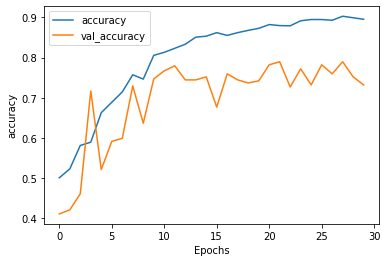

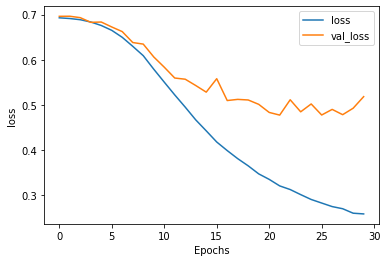

In [46]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Get files for visualizing the network

The code below will download two files for visualizing how your network "sees" the sentiment related to each word. Head to http://projector.tensorflow.org/ and load these files, then click the checkbox to "sphereize" the data.

Note: You may run into errors with the projection if your `vocab_size` earlier was larger than the actual number of words in the vocabulary, in which case you'll need to decrease this variable and re-train in order to visualize.

In [47]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(500, 16)


In [48]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [49]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')              

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

# Try adding reviews of your own
# Add some negative words (such as "not") to the good reviews and see what happens
# For example:
# they gave us free chocolate cake and did not charge us

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

I love this phone
[0.92951596]


I hate spaghetti
[0.18286431]


Everything was cold
[0.6463338]


Everything was hot exactly as I wanted
[0.47749835]


Everything was green
[0.6463338]


the host seated us immediately
[0.6370108]


they gave us free chocolate cake
[0.8800775]


not sure about the wilted flowers on the table
[0.12053791]


only works when I stand on tippy toes
[0.8839419]


does not work when I stand on my head
[0.02706203]


